# **City of Chicago Traffic Crashes**

<div style="width: 2000px; overflow: hidden;">
  <header style="height: 5in; display: flex; justify-content: center; align-items: center;">
    <img src="..\chicago2.png" alt="Chicago skyline" style="height: 5in; width: 100%; object-fit: cover;"/>
  </header>
</div>


# **1. Business Understanding**

# **2. Data Understanding**

### **a) Imported relevant modules**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#### **b) Loading the dataset**

In [2]:
df = pd.read_csv('..\Traffic_Crashes_-_Crashes_20241007.csv')
df.head()

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7...,NaN,09/05/2023 07:05:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DUSK,ANGLE,"FIVE POINT, OR MORE",...,2.0,0.0,2.0,0.0,19,3,9,NaN,NaN,NaN
1,2675c13fd0f474d730a5b780968b3cafc7c12d7adb661f...,NaN,09/22/2023 06:45:00 PM,50,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,...,0.0,0.0,2.0,0.0,18,6,9,NaN,NaN,NaN
2,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,NaN,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,1.0,0.0,14,7,7,41.85412,-87.665902,POINT (-87.665902342962 41.854120262952)
3,7ebf015016f83d09b321afd671a836d6b148330535d5df...,NaN,08/09/2023 11:00:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,NOT DIVIDED,...,0.0,0.0,2.0,0.0,23,4,8,NaN,NaN,NaN
4,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,NaN,08/18/2023 12:50:00 PM,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,...,1.0,0.0,1.0,0.0,12,6,8,NaN,NaN,NaN


### **c) Stratifed Random Sampling**

In [3]:
from sklearn.model_selection import train_test_split

# Assuming 'CRASH_TYPE' is the column to stratify by
data, out_of_sample_data = train_test_split(df, test_size=0.5, stratify=df['CRASH_TYPE'], random_state=42)

# Check the shape
print('Sampled Data Shape: ', data.shape)
print('Out of Sample Data Shape: ', out_of_sample_data.shape)

Sampled Data Shape:  (440198, 48)
Out of Sample Data Shape:  (440199, 48)


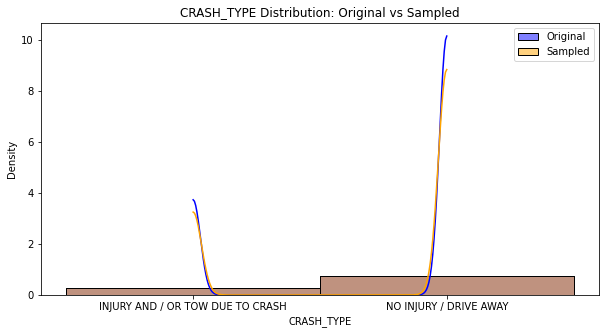

In [4]:
# Compare the distribution of a key feature like 'CRASH_TYPE'
plt.figure(figsize=(10, 5))

# Original dataset
sns.histplot(df['CRASH_TYPE'], color='blue', label='Original', stat='density', kde=True)

# Sampled dataset
sns.histplot(data['CRASH_TYPE'], color='orange', label='Sampled', stat='density', kde=True)

plt.legend()
plt.title('CRASH_TYPE Distribution: Original vs Sampled')
plt.show()


Based on the chart, the two distributions look very similar, which is a good indication that the stratified sampling has successfully preserved the overall distribution of the original dataset. This close alignment means the sample is representative of the original data, which is exactly what we aim for with stratified sampling.

### **d) Data Shape**

In [5]:
print('Our data has {} rows and {} columns'.format(data.shape[0], data.shape[1]))

Our data has 440198 rows and 48 columns


### **e) Data Description**

In [6]:
data.describe()

,POSTED_SPEED_LIMIT,LANE_CNT,STREET_NO,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
count,440198.000000,99211.000000,440198.000000,440196.000000,440198.000000,439225.000000,439225.000000,439225.000000,439225.000000,439225.000000,439225.000000,439225.0,440198.000000,440198.000000,440198.000000,437100.000000,437100.000000
mean,28.417401,7.787675,3686.158899,1244.141641,2.035261,0.193115,0.001157,0.020129,0.108500,0.063330,2.001969,0.0,13.201350,4.120618,6.640753,41.854585,-87.672620
std,6.128995,1177.411499,2839.345543,704.842397,0.452966,0.569814,0.037126,0.167704,0.424578,0.321306,1.153522,0.0,5.571388,1.983092,3.365347,0.362846,0.740714
min,0.000000,0.000000,0.000000,111.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.000000,-87.934014
25%,30.000000,2.000000,1253.000000,714.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,9.000000,2.000000,4.000000,41.783180,-87.721643
50%,30.000000,2.000000,3200.000000,1212.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,14.000000,4.000000,7.000000,41.874840,-87.674176
75%,30.000000,4.000000,5559.000000,1822.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,17.000000,6.000000,9.000000,41.924442,-87.633481
max,99.000000,299679.000000,13799.000000,6100.000000,18.000000,21.000000,3.000000,10.000000,21.000000,11.000000,48.000000,0.0,23.000000,7.000000,12.000000,42.022780,0.000000


Our data seems to prescribe conditions surrounding a crash as well as the crash's outcome.

The columns include:
1. CRASH_RECORD_ID: Unique ID for each crash, used to link to related datasets.
2. CRASH_DATE_EST_I: Estimated crash date if reported later.
3. CRASH_DATE: Date and time of the crash.
4. POSTED_SPEED_LIMIT: Speed limit at the crash location.
5. TRAFFIC_CONTROL_DEVICE: Traffic control device present.
6. DEVICE_CONDITION: Condition of the traffic control device.
7. WEATHER_CONDITION: Weather at the time of the crash.
8. LIGHTING_CONDITION: Lighting at the time of the crash.
9. FIRST_CRASH_TYPE: Type of first collision.
10. TRAFFICWAY_TYPE: Type of trafficway.
11. LANE_CNT: Number of through lanes.
12. ALIGNMENT: Street alignment.
13. ROADWAY_SURFACE_COND: Road surface condition.
14. ROAD_DEFECT: Road defects.
15. REPORT_TYPE: Type of report (at scene, at desk, amended).
16. **CRASH_TYPE: Severity classification of the crash.**
17. INTERSECTION_RELATED_I: Whether an intersection played a role.
18. NOT_RIGHT_OF_WAY_I: Whether the crash occurred outside the public right-of-way.
19. HIT_AND_RUN_I: Whether it was a hit-and-run.
20. DAMAGE: Estimated damage.
21. DATE_POLICE_NOTIFIED: Date police were notified.
22. PRIM_CONTRIBUTORY_CAUSE: Primary cause of the crash.
23. SEC_CONTRIBUTORY_CAUSE: Secondary cause of the crash.
24. STREET_NO: Street address number.
25. STREET_DIRECTION: Street address direction.
26. STREET_NAME: Street address name.
27. BEAT_OF_OCCURRENCE: Chicago Police Department Beat ID.
28. PHOTOS_TAKEN_I: Whether photos were taken.
29. STATEMENTS_TAKEN_I: Whether statements were taken.
30. DOORING_I: Whether it involved dooring.
31. WORK_ZONE_I: Whether it occurred in a work zone.
32. WORK_ZONE_TYPE: Type of work zone.
33. WORKERS_PRESENT_I: Whether workers were present.
34. NUM_UNITS: Number of units involved.
35. MOST_SEVERE_INJURY: Most severe injury sustained1.
36. INJURIES_TOTAL: Total number of injuries.
37. NJURIES_FATAL: Number of fatal injuries.
38. INJURIES_INCAPACITATING: Number of incapacitating injuries.
39. INJURIES_NON_INCAPACITATING: Number of non-incapacitating injuries.
40. INJURIES_REPORTED_NOT_EVIDENT: Number of reported but not evident injuries.
41. INJURIES_NO_INDICATION: Number of no indication of injuries.
42. INJURIES_UNKNOWN: Number of unknown injuries.
43. CRASH_HOUR: Hour of the crash.
44. CRASH_DAY_OF_WEEK: Day of the week of the crash.
45. CRASH_MONTH: Month of the crash.
46. LATITUDE: Latitude of the crash location.
47. LONGITUDE: Longitude of the crash location.
48. LOCATION: Geographic location of the crash.

**Our Target Variable is CRASH TYPE as it aligns best with our objective of predicting Crash Severity given the column descriptions**

### **f) Duplicates**

In [7]:
data.duplicated().sum()

0

There are no duplicates in our dataset

Our dataset is quite large with several columns that seem to contain similar information. Below we inspect datatypes

### **g) Datatypes**

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440198 entries, 495307 to 484789
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                440198 non-null  object 
 1   CRASH_DATE_EST_I               32640 non-null   object 
 2   CRASH_DATE                     440198 non-null  object 
 3   POSTED_SPEED_LIMIT             440198 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE         440198 non-null  object 
 5   DEVICE_CONDITION               440198 non-null  object 
 6   WEATHER_CONDITION              440198 non-null  object 
 7   LIGHTING_CONDITION             440198 non-null  object 
 8   FIRST_CRASH_TYPE               440198 non-null  object 
 9   TRAFFICWAY_TYPE                440198 non-null  object 
 10  LANE_CNT                       99211 non-null   float64
 11  ALIGNMENT                      440198 non-null  object 
 12  ROADWAY_SURFACE_COND     

Our dataset is quite large with several columns that seem to contain similar information.



Below we drop some columns that have limited useful information given our overall objective. First, we will combine the street information to replace our location column which has GPS coordinates


In [9]:
data['LOCATION'] = data['STREET_NO'].astype(str) + ' ' + data['STREET_DIRECTION'] + ' ' + data['STREET_NAME']
data['LOCATION'].head()

495307       4437 S CICERO AVE
269890    11500 S MICHIGAN AVE
205916        4328 W HIRSCH ST
399022     4837 S MICHIGAN AVE
704592          3500 W 71ST ST
Name: LOCATION, dtype: object

In [10]:
columns_to_drop = ['CRASH_RECORD_ID','CRASH_DATE_EST_I', 'CRASH_DATE','REPORT_TYPE', 'TRAFFIC_CONTROL_DEVICE',
    'PHOTOS_TAKEN_I','STATEMENTS_TAKEN_I','DOORING_I','STREET_NO','STREET_DIRECTION','STREET_NAME','DATE_POLICE_NOTIFIED',
    'BEAT_OF_OCCURRENCE','LANE_CNT','LATITUDE', 'LONGITUDE','INJURIES_REPORTED_NOT_EVIDENT','INJURIES_NO_INDICATION','INJURIES_UNKNOWN']

relevant_data = data.drop(columns = columns_to_drop, axis=1)
relevant_data.head()

,POSTED_SPEED_LIMIT,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,CRASH_TYPE,...,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LOCATION
495307,30,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,16,4,7,4437 S CICERO AVE
269890,35,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,13,2,4,11500 S MICHIGAN AVE
205916,30,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,19,7,8,4328 W HIRSCH ST
399022,30,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,12,3,3,4837 S MICHIGAN AVE
704592,35,FUNCTIONING PROPERLY,CLEAR,DARKNESS,TURNING,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,1,1,10,3500 W 71ST ST


### **h) Missing Values**

Next, we will look at missing data by column percentage.

In [11]:
relevant_data.isna().sum()/data.shape[0]*100

POSTED_SPEED_LIMIT              0.000000
DEVICE_CONDITION                0.000000
WEATHER_CONDITION               0.000000
LIGHTING_CONDITION              0.000000
FIRST_CRASH_TYPE                0.000000
TRAFFICWAY_TYPE                 0.000000
ALIGNMENT                       0.000000
ROADWAY_SURFACE_COND            0.000000
ROAD_DEFECT                     0.000000
CRASH_TYPE                      0.000000
INTERSECTION_RELATED_I         77.005348
NOT_RIGHT_OF_WAY_I             95.460225
HIT_AND_RUN_I                  68.620257
DAMAGE                          0.000000
PRIM_CONTRIBUTORY_CAUSE         0.000000
SEC_CONTRIBUTORY_CAUSE          0.000000
WORK_ZONE_I                    99.439343
WORK_ZONE_TYPE                 99.570648
WORKERS_PRESENT_I              99.857110
NUM_UNITS                       0.000000
MOST_SEVERE_INJURY              0.222400
INJURIES_TOTAL                  0.221037
INJURIES_FATAL                  0.221037
INJURIES_INCAPACITATING         0.221037
INJURIES_NON_INC

In [12]:
print([col for col in relevant_data.columns 
    if relevant_data[col].isna().sum()/relevant_data.shape[0]*100 > 50])

['INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'WORK_ZONE_I', 'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I']


From a review of the data, we need to distinguish between missing values where this indicates 'no' or 'negative' from situations with actual missing data.

Based on the most affected columns:

- INTERSECTION_RELATED_I - missing value seem to equal N (no).
- HIT_AND_RUN_I - missing value seem to equal N (no).
- NOT_RIGHT_OF_WAY_I - missing value seem to equal N (no).
- WORKZONE_I - missing value seem to equal N (no).
- WORK_ZONE_TYPE -- missing value seem to equal not a work zone.
- WORKERS_PRESENT_I- missing value seem to equal N (no).

Below we deal with missing values for these columns

In [13]:
columns_to_fill_with_N = ['INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I', 
    'HIT_AND_RUN_I', 'WORK_ZONE_I', 'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I']  #columns with many missing values which should actually be N

# Fill the selected columns with 'N'
relevant_data[columns_to_fill_with_N] = relevant_data[columns_to_fill_with_N].fillna('N') #fill the columns with N

# Fill 'WORK_ZONE_TYPE' with 'Other'
relevant_data['WORK_ZONE_TYPE'] = relevant_data['WORK_ZONE_TYPE'].fillna('Other') #fill this column with Other
relevant_data.head()


,POSTED_SPEED_LIMIT,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,CRASH_TYPE,...,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LOCATION
495307,30,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,16,4,7,4437 S CICERO AVE
269890,35,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,13,2,4,11500 S MICHIGAN AVE
205916,30,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,19,7,8,4328 W HIRSCH ST
399022,30,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,12,3,3,4837 S MICHIGAN AVE
704592,35,FUNCTIONING PROPERLY,CLEAR,DARKNESS,TURNING,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,1,1,10,3500 W 71ST ST


In [14]:
relevant_data.isna().sum()

POSTED_SPEED_LIMIT               0
DEVICE_CONDITION                 0
WEATHER_CONDITION                0
LIGHTING_CONDITION               0
FIRST_CRASH_TYPE                 0
TRAFFICWAY_TYPE                  0
ALIGNMENT                        0
ROADWAY_SURFACE_COND             0
ROAD_DEFECT                      0
CRASH_TYPE                       0
INTERSECTION_RELATED_I           0
NOT_RIGHT_OF_WAY_I               0
HIT_AND_RUN_I                    0
DAMAGE                           0
PRIM_CONTRIBUTORY_CAUSE          0
SEC_CONTRIBUTORY_CAUSE           0
WORK_ZONE_I                      0
WORK_ZONE_TYPE                   0
WORKERS_PRESENT_I                0
NUM_UNITS                        0
MOST_SEVERE_INJURY             979
INJURIES_TOTAL                 973
INJURIES_FATAL                 973
INJURIES_INCAPACITATING        973
INJURIES_NON_INCAPACITATING    973
CRASH_HOUR                       0
CRASH_DAY_OF_WEEK                0
CRASH_MONTH                      0
LOCATION            

We can drop the remaining columns with missing values as their number is small and unlikely to affect the overall data distribution materially

In [15]:
relevant_data.dropna(inplace=True)
relevant_data.isna().sum().sum()

0

### **i) Variable Types**

In [16]:
# Separate categorical columns
categorical_columns = relevant_data.select_dtypes(include=['object']).columns.tolist()

# Separate continuous (numerical) columns
continuous_columns = relevant_data.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Display the separated columns
print(f"We have {len(categorical_columns)} categorical columns and {len(continuous_columns)} continuous columns")

We have 20 categorical columns and 9 continuous columns


# **3. EDA & Data Preparation**

### **a) Basic Descriptive Statistics**

- **Continuous Columns:** We will get an overview of the distribution, central tendency, and spread

In [17]:
relevant_data[continuous_columns].describe()

,POSTED_SPEED_LIMIT,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH
count,439217.000000,439217.000000,439217.000000,439217.000000,439217.000000,439217.000000,439217.000000,439217.000000,439217.000000
mean,28.424116,2.036164,0.193119,0.001157,0.020129,0.108502,13.205746,4.121147,6.640542
std,6.122032,0.451592,0.569819,0.037127,0.167706,0.424581,5.566176,1.982705,3.365398
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,30.000000,2.000000,0.000000,0.000000,0.000000,0.000000,9.000000,2.000000,4.000000
50%,30.000000,2.000000,0.000000,0.000000,0.000000,0.000000,14.000000,4.000000,7.000000
75%,30.000000,2.000000,0.000000,0.000000,0.000000,0.000000,17.000000,6.000000,9.000000
max,99.000000,18.000000,21.000000,3.000000,10.000000,21.000000,23.000000,7.000000,12.000000


Our continuous data seems to have different scales across different features. Hence we may need to scale it

- **Categorical Columns:** We will get an overview of the distribution in each categorical column

In [18]:
relevant_data[categorical_columns].describe()

,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,WORK_ZONE_I,WORK_ZONE_TYPE,WORKERS_PRESENT_I,MOST_SEVERE_INJURY,LOCATION
count,439217,439217,439217,439217,439217,439217,439217,439217,439217,439217,439217,439217,439217,439217,439217,439217,439217,439217,439217,439217
unique,8,12,6,18,20,6,7,7,2,2,2,2,3,40,40,2,5,2,5,211249
top,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,N,N,N,"OVER $1,500",UNABLE TO DETERMINE,NOT APPLICABLE,N,N,N,NO INDICATION OF INJURY,10000 W OHARE ST
freq,251204,345632,282825,101663,189346,428800,324958,350446,321339,342820,421182,307401,275548,171422,180661,437331,437331,438661,377551,698


Some of our categorical features have a lot of categories. Hence we may need to use **target encoding** to deal with high cardinality.

Target encoding replaces each category with the mean of the target variable for that category. This reduces the dimensionality by not increasing the number of features, which can help in preventing overfitting. Example: If a category is frequently associated with fatalities, the encoding will reflect that association. Target encoding should not alter the shape of our data.

### **c) Visualizations**

We will use visualizations to help display the relationships and patterns in our data intuitively.

- **Distribution of continuous features:**

**1) Histograms**

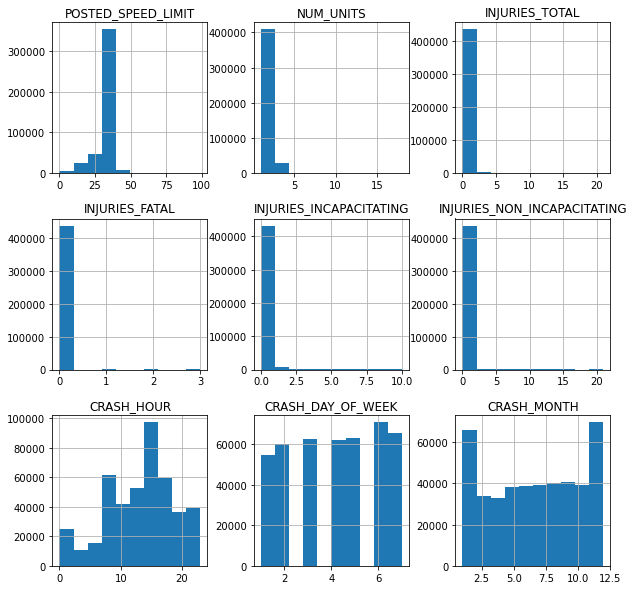

In [19]:
import matplotlib.pyplot as plt
relevant_data[continuous_columns].hist(figsize=(10, 10), bins=10) #plot histograms
plt.show()


Although we currently classify 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', as continuous features, their distributions imply that they represent discrete time periods rather than a continuous range. Each hour, day, and month is a distinct category which may have unique traffic patterns. We will convert these features to categorical

In [20]:
time_col = ['CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH']

relevant_data[time_col] = relevant_data[time_col].astype('category') #convert to categorical data type

continuous_columns = [col for col in continuous_columns if col not in time_col] #remove from list of continuous columns

[categorical_columns.append(col) for col in time_col] #add to categorical columns

print(f"We now have {len(categorical_columns)} categorical columns and {len(continuous_columns)} continuous columns")

We now have 23 categorical columns and 6 continuous columns


We can also visualize our continuous columns using boxplots to check for outliers

**2) Boxplots**

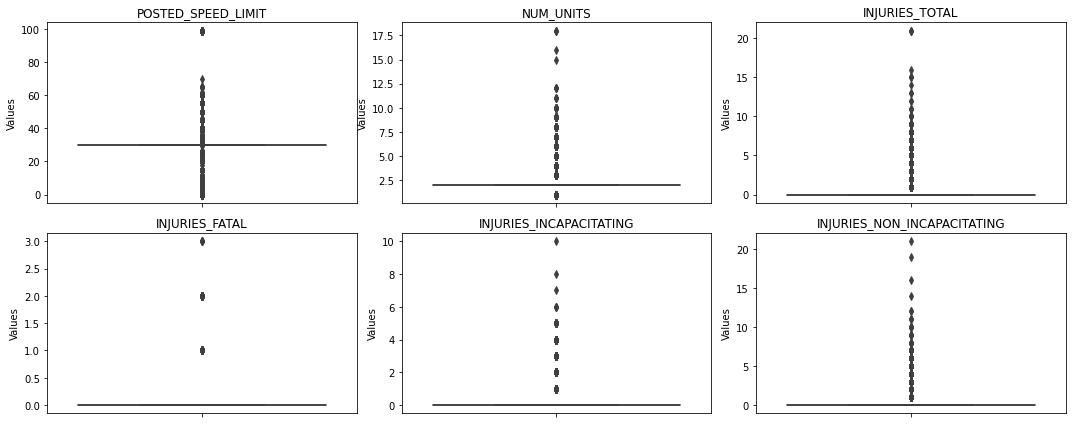

In [21]:
# Create a grid of subplots with 2 rows and 3 columns
fig, axes = plt.subplots(2, 3, figsize=(15, 6))

# Iterate over the continuous columns and plot each one in a separate subplot
for i, col in enumerate(continuous_columns):
    # Get the appropriate subplot
    ax = axes[i // 3, i % 3]
    
    sns.boxplot(y=relevant_data[col], ax=ax)
    
    # Set the title of the subplot
    ax.set_title(col)
    
    # Set labels for y-axis
    ax.set_ylabel("Values")

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()


Looking at the boxplots, our continuous columns appear concentrated in certain values likely due to the nature of the crash data. It seems like there might be a lot of zero values which might give the appearance of categories but the features are actually continuous.

- **POSTED_SPEED_LIMIT:** This is continuous, but there might be common values (e.g., 30, 40 mph) that make it appear categorical.
- **NUM_UNITS:** The number of units (vehicles, people) involved in a crash. This is likely continuous (discrete, but not categorical).
- **INJURIES_TOTAL, INJURIES_FATAL, INJURIES_INCAPACITATING, INJURIES_NON_INCAPACITATING:** These are continuous as they count the number of injuries, though they might have many zeroes.

Further, our data does not seem to have any outliers.

**3) Bar Plots**

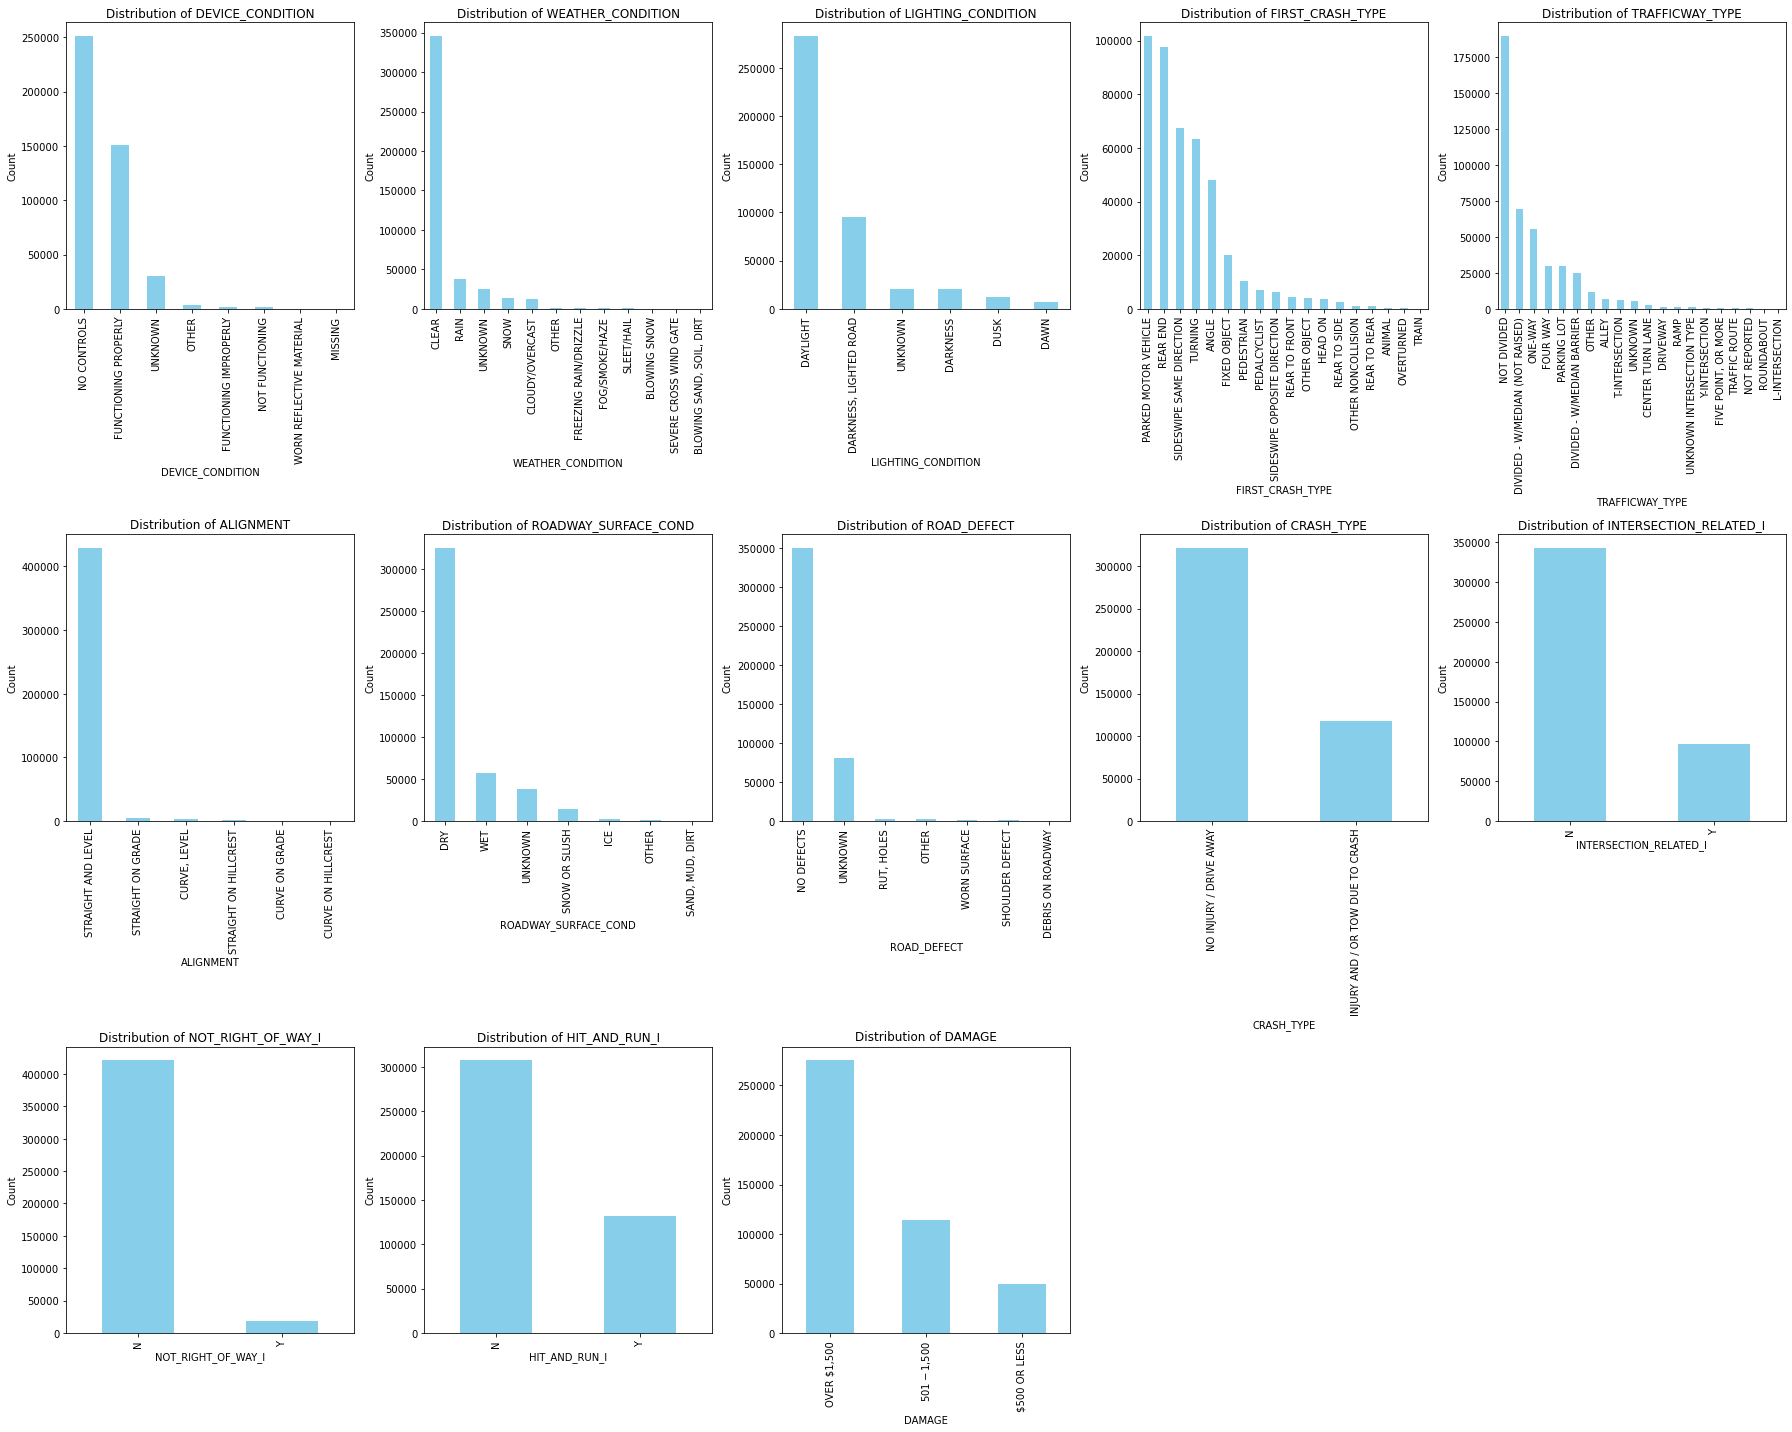

In [22]:
#we will remove location data as it is hard to represent in the plot
categorical_columns.remove('LOCATION') 
# Determine number of rows and columns for the subplots based on the number of categorical columns
n_cols = 5
n_rows = (len(categorical_columns[:13]) + n_cols - 1) // n_cols  # This ensures enough rows

fig, axes = plt.subplots(n_rows, n_cols,figsize=(25, 20)) #create subplots

axes = axes.flatten() #flatten axes

#plot each categorical column in a subplot
for i, col in enumerate(categorical_columns[:13]):
    relevant_data[col].value_counts().plot(kind = 'bar', ax=axes[i], color = 'skyblue')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

#remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout() #prevent overlapping
plt.show()

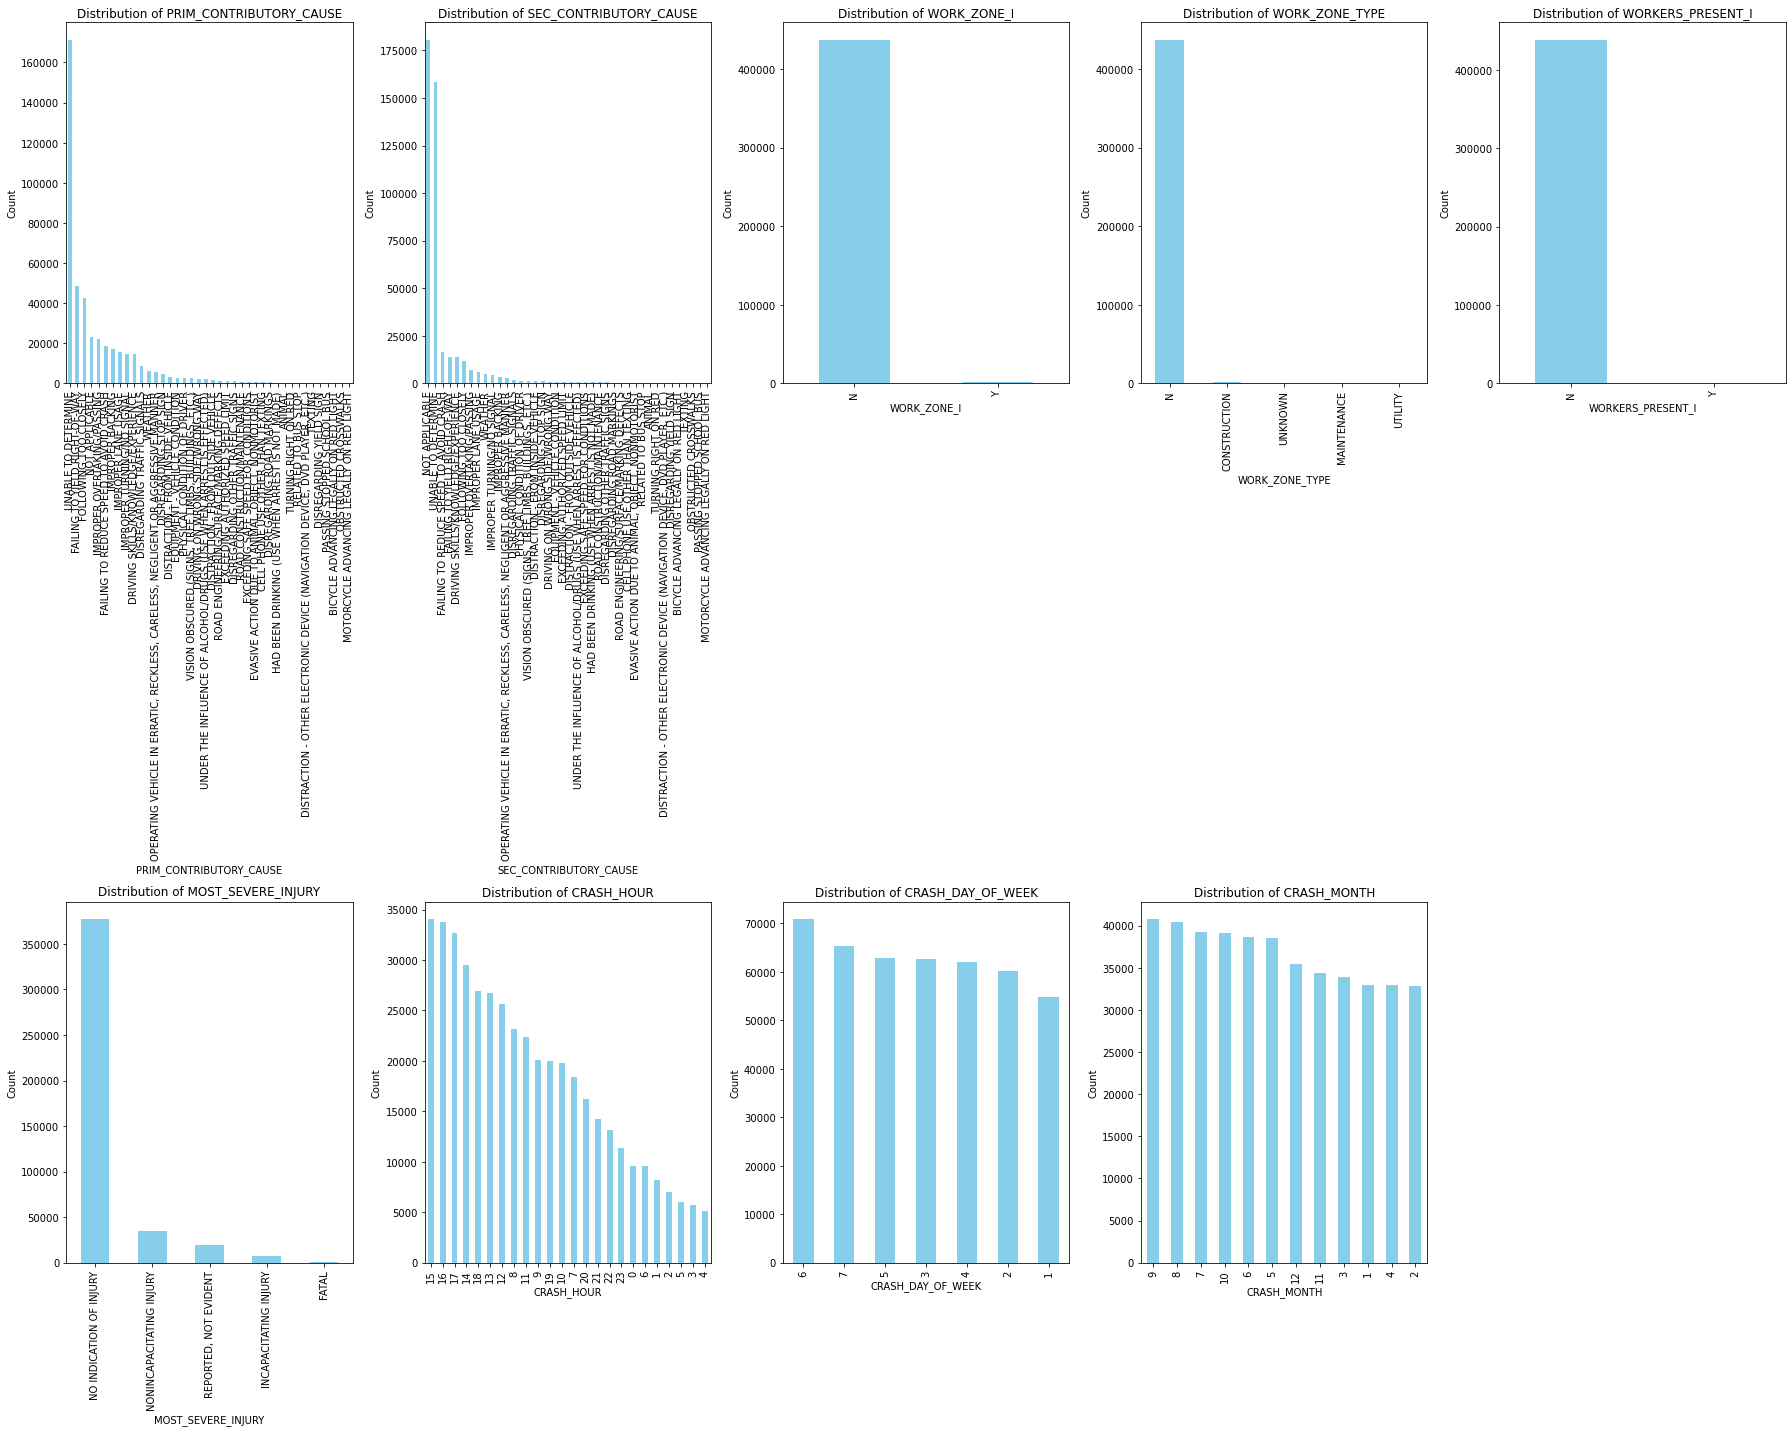

In [23]:
#we will remove location data as it is hard to represent in the plot
#categorical_columns.remove('LOCATION') 

# Determine number of rows and columns for the subplots based on the number of categorical columns
n_cols = 5
n_rows = (len(categorical_columns[13:]) + n_cols - 1) // n_cols  # This ensures enough rows

fig, axes = plt.subplots(n_rows, n_cols,figsize=(25, 20)) #create subplots

axes = axes.flatten() #flatten axes

#plot each categorical column in a subplot
for i, col in enumerate(categorical_columns[13:]):
    relevant_data[col].value_counts().plot(kind = 'bar', ax=axes[i], color = 'skyblue')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

#remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout() #prevent overlapping
plt.show()

**Specific Feature/Target Variable Observations:**

- **Distribution of Crash Types:** 

Our target variable shows significant class imbalance. There are no injuries in most accidents and the drivers tend to drive away from these incidences.

- **Relationship Between Features and Crash Type:**

Weather Condition: If the weather condition shows a significant difference in counts between crash types, it might imply that certain conditions lead to more severe crashes.

Lighting Condition: Similar to weather, if there are trends in lighting conditions correlating with specific crash types, this could highlight risk factors to consider in analysis.

Traffic Control Device: The presence or absence of certain devices could correlate with specific crash types, such as more accidents occurring at intersections without signals.

- **Injury Counts and Crash Severity:**

Features like INJURIES_TOTAL, INJURIES_FATAL, and INJURIES_INCAPACITATING should be closely examined against the CRASH_TYPE. Higher injury counts in certain crash types may suggest a higher severity or risk associated with those types.
If INJURIES_TOTAL has a significantly higher count for a particular CRASH_TYPE, it indicates that crashes of this type tend to be more severe, which could influence how you model severity.

- **Posted Speed Limit:**

If the POSTED_SPEED_LIMIT shows varying counts across crash types, it may imply that certain speed limits correlate with the likelihood or severity of specific crash types. For instance, higher speed limits might lead to more severe crashes.

- **NUM_UNITS:**

If NUM_UNITS (the number of vehicles involved) displays a significant relationship with certain crash types, it suggests that some types are more likely to involve multiple vehicles (e.g., collisions vs. single-vehicle crashes).
Feature Interaction:

- **Work Zones:**

Work zone-related crashes are relatively uncommon, but when they do occur, they're most often in construction zones.

- **Crash Contributory Causes:**

There's a wide variety of primary contributory causes for crashes. A few causes appear much more frequently than others, with the tallest bars representing the most common causes. Many causes have relatively low occurrence rates, as shown by the numerous short bars.The distribution for secondary causes is similar to the primary cause, with a few dominant causes and many less frequent ones. The overall counts seem lower than for primary causes, which is expected.

**General Observations:**

- **Highly Skewed Distributions:**

Several columns have highly skewed distributions with a single category dominating most of the data. For instance, in plots like the second and third from the top row, there is one bar much larger than the others. This indicates that most of the values for those features belong to a single category.

- **Sparse Representation:**

Some plots show that there are multiple categories, but many of these have very low representation (almost no bar height), suggesting these categories are relatively rare. A few plots show two or three dominant categories with sizable bars. These are features where a few categories have a significant share of data, while the rest have smaller frequencies. This can be seen in the plots from the third row.

- **Mix of Categoriscal and Binary Variables:**

The dataset seems to have a mix of categorical and binary variables related to crash circumstances.

 - **Potential for Feature Engineering:**

For features with many rare categories, you may want to consider combining the rare categories into an “Other” group or apply techniques such as target encoding or leave-one-out encoding if they are important for your model.
These findings suggest that certain columns may not provide much distinguishing information due to their imbalance, while others may have meaningful splits between a few key categories.

### **d) Correlation Analysis**

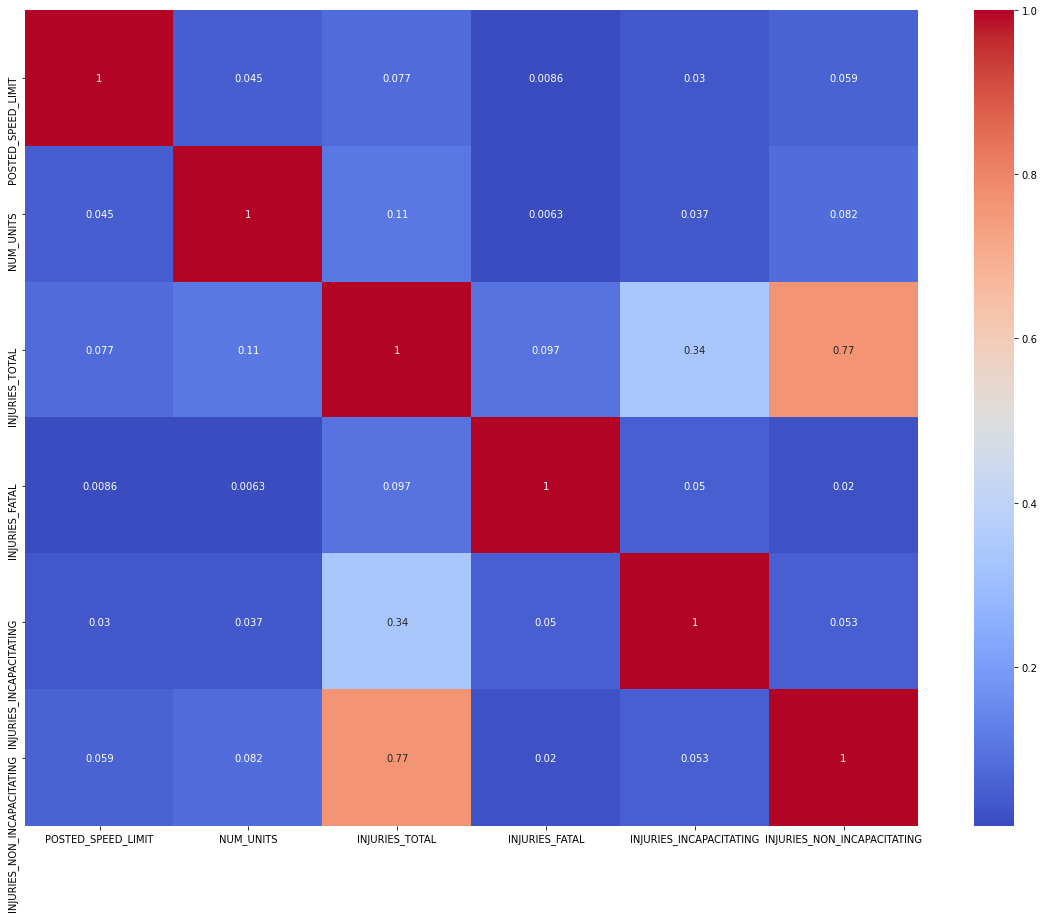

In [24]:
plt.subplots(figsize=(20,15))
sns.heatmap(relevant_data.corr(),cmap="coolwarm",annot=True);

Our correlation analysis only includes numerical features with only INJURIES_TOTAL and INJURY_NON_INCAPACITATING having high correlation (77%) which is to be expected.

### **e) Encoding**

Below we have a summary of unique values for our columns

In [25]:
print('Summary of Frequency Distribution in our Features\n')


high_cardinality_cols = [column for column in relevant_data[categorical_columns].columns if relevant_data[categorical_columns][column].nunique() > 7] #high cardinality features
high_cardinality_cols.append('LOCATION') #add Location back
print('High Cardinality Cols:', high_cardinality_cols)

low_cardinality_cols = [column for column in relevant_data[categorical_columns].columns if relevant_data[categorical_columns][column].nunique() <= 7] #low cardinality features
print('Low Cardinality Cols:', low_cardinality_cols)


Summary of Frequency Distribution in our Features

High Cardinality Cols: ['DEVICE_CONDITION', 'WEATHER_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'CRASH_HOUR', 'CRASH_MONTH', 'LOCATION']
Low Cardinality Cols: ['LIGHTING_CONDITION', 'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'CRASH_TYPE', 'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'WORK_ZONE_I', 'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'MOST_SEVERE_INJURY', 'CRASH_DAY_OF_WEEK']


Summary of Frequency Distribution in our Dataset

High Cardinality Columns:
- DEVICE_CONDITION - 8 unique values
- WEATHER_CONDITION - 12 unique values
- FIRST_CRASH_TYPE - 18 unique values
- TRAFFICWAY_TYPE - 20 unique values
- PRIM_CONTRIBUTORY_CAUSE - 40 unique values
- SEC_CONTRIBUTORY_CAUSE - 40 unique values
- CRASH_HOUR - 24 unique values
- CRASH_MONTH - 12 unique values
- LOCATION -211249 unique values

Low Cardinality Columns:
- LIGHTING_CONDITION - 6 unique values
- ALIGNMENT - 6 unique values
- ROADWAY_SURFACE_COND - 7 unique values
- ROAD_DEFECT - 7 unique values
- CRASH_TYPE - 2 unique values
- INTERSECTION_RELATED_I - 2 unique values
- NOT_RIGHT_OF_WAY_I - 2 unique values
- HIT_AND_RUN_I - 2 unique values
- DAMAGE - 3 unique values
- WORK_ZONE_I - 2 unique values
- WORK_ZONE_TYPE - 5 unique values
- WORKERS_PRESENT_I - 2 unique values
- MOST_SEVERE_INJURY - 5 unique values
- CRASH_DAY_OF_WEEK - 7 unique values

We will start by splitting our data into a training and test set before proceeding to avoid any data leakage

In [26]:
X=relevant_data.drop('CRASH_TYPE', axis=1)
y=relevant_data['CRASH_TYPE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (285491, 28)
X_test shape: (153726, 28)
y_train shape: (285491,)
y_test shape: (153726,)


Below we use a pipeline to encode our data after binarizing our target 

In [27]:
# Binarize y (the target variable) directly
y_train = y_train.map({'NO INJURY / DRIVE AWAY': 0, 'INJURY AND / OR TOW DUE TO CRASH': 1})
y_test = y_test.map({'NO INJURY / DRIVE AWAY': 0, 'INJURY AND / OR TOW DUE TO CRASH': 1})

y_train

576973    0
238196    1
237931    0
204115    0
596755    0
         ..
217085    1
256964    0
160680    1
643299    0
305053    1
Name: CRASH_TYPE, Length: 285491, dtype: int64

In [28]:
low_cardinality_cols

['LIGHTING_CONDITION',
 'ALIGNMENT',
 'ROADWAY_SURFACE_COND',
 'ROAD_DEFECT',
 'CRASH_TYPE',
 'INTERSECTION_RELATED_I',
 'NOT_RIGHT_OF_WAY_I',
 'HIT_AND_RUN_I',
 'DAMAGE',
 'WORK_ZONE_I',
 'WORK_ZONE_TYPE',
 'WORKERS_PRESENT_I',
 'MOST_SEVERE_INJURY',
 'CRASH_DAY_OF_WEEK']

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from category_encoders.target_encoder import TargetEncoder


#remove CRASH_TYPE from low_cardinality_cols
low_cardinality_cols.remove('CRASH_TYPE')

# Create your column transformer
preprocessor = ColumnTransformer(
    transformers=[    
        ('cat_high', Pipeline(steps=[
            ('target_encoder', TargetEncoder(cols=high_cardinality_cols))  # Target encode high-cardinality columns
        ]), high_cardinality_cols),
        ('ohe', OneHotEncoder(), low_cardinality_cols)  # One-hot encode low-cardinality columns
    ],
    remainder='passthrough'  # Keep other columns as is
)

# Create the full pipeline for feature transformations
pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),  # Preprocess data
])

# Fit the pipeline on training data (X_train) and transform both X_train and X_test
pipeline.fit(X_train, y_train)

# Transform the data
X_train_encoded = pipeline.transform(X_train)
X_test_encoded = pipeline.transform(X_test)

column_names = pipeline.named_steps['preprocess'].get_feature_names_out()

# Convert the output of the pipeline to DataFrame
X_train = pd.DataFrame(X_train_encoded, columns=column_names)
X_test = pd.DataFrame(X_test_encoded, columns=column_names)


# Print the number of rows and features
print('No. of rows in encoded data:', X_train.shape[0]+X_test.shape[0])
print('No. of rows in original data:', relevant_data.shape[0])
print(f'No. of features in encoded data {X_train.shape[1]} in Train Set and {X_train.shape[1]} in Test Set:')
print('No. of features in original data:', relevant_data.shape[1])

No. of rows in encoded data: 439217
No. of rows in original data: 439217
No. of features in encoded data 71 in Train Set and 71 in Test Set:
No. of features in original data: 29


Below we preview our data to make sure it's ready for modeling

In [31]:
X_train.head()

,cat_high__DEVICE_CONDITION,cat_high__WEATHER_CONDITION,cat_high__FIRST_CRASH_TYPE,cat_high__TRAFFICWAY_TYPE,cat_high__PRIM_CONTRIBUTORY_CAUSE,cat_high__SEC_CONTRIBUTORY_CAUSE,cat_high__CRASH_HOUR,cat_high__CRASH_MONTH,cat_high__LOCATION,ohe__LIGHTING_CONDITION_DARKNESS,...,ohe__CRASH_DAY_OF_WEEK_4,ohe__CRASH_DAY_OF_WEEK_5,ohe__CRASH_DAY_OF_WEEK_6,ohe__CRASH_DAY_OF_WEEK_7,remainder__POSTED_SPEED_LIMIT,remainder__NUM_UNITS,remainder__INJURIES_TOTAL,remainder__INJURIES_FATAL,remainder__INJURIES_INCAPACITATING,remainder__INJURIES_NON_INCAPACITATING
0,0.231780,0.269004,0.234363,0.257672,0.201976,0.252793,0.484342,0.266707,0.233507,0.0,...,0.0,0.0,1.0,0.0,30.0,2.0,0.0,0.0,0.0,0.0
1,0.337407,0.269004,0.427121,0.378902,0.395946,0.415442,0.229822,0.258611,0.363615,0.0,...,0.0,0.0,0.0,0.0,30.0,2.0,0.0,0.0,0.0,0.0
2,0.231780,0.279458,0.174846,0.200442,0.215178,0.252793,0.256257,0.269705,0.233507,0.0,...,0.0,0.0,0.0,0.0,30.0,2.0,0.0,0.0,0.0,0.0
3,0.231780,0.292733,0.174846,0.288892,0.059196,0.241313,0.225790,0.265754,0.230355,0.0,...,1.0,0.0,0.0,0.0,25.0,2.0,0.0,0.0,0.0,0.0
4,0.337407,0.269004,0.118697,0.257672,0.143887,0.241313,0.227144,0.240869,0.159216,0.0,...,0.0,0.0,1.0,0.0,30.0,2.0,0.0,0.0,0.0,0.0


In [32]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285491 entries, 0 to 285490
Data columns (total 71 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   cat_high__DEVICE_CONDITION                        285491 non-null  float64
 1   cat_high__WEATHER_CONDITION                       285491 non-null  float64
 2   cat_high__FIRST_CRASH_TYPE                        285491 non-null  float64
 3   cat_high__TRAFFICWAY_TYPE                         285491 non-null  float64
 4   cat_high__PRIM_CONTRIBUTORY_CAUSE                 285491 non-null  float64
 5   cat_high__SEC_CONTRIBUTORY_CAUSE                  285491 non-null  float64
 6   cat_high__CRASH_HOUR                              285491 non-null  float64
 7   cat_high__CRASH_MONTH                             285491 non-null  float64
 8   cat_high__LOCATION                                285491 non-null  float64
 9   ohe_

In [33]:
X_train.isna().sum().sum()

0

In [34]:
y_train.head()

576973    0
238196    1
237931    0
204115    0
596755    0
Name: CRASH_TYPE, dtype: int64

Our data looks ok.

Below, we run correlation analysis afresh after encoding our data as this will give us a better representation of the correlation our features have with the target variable since we have a numerical representation of our dataset.

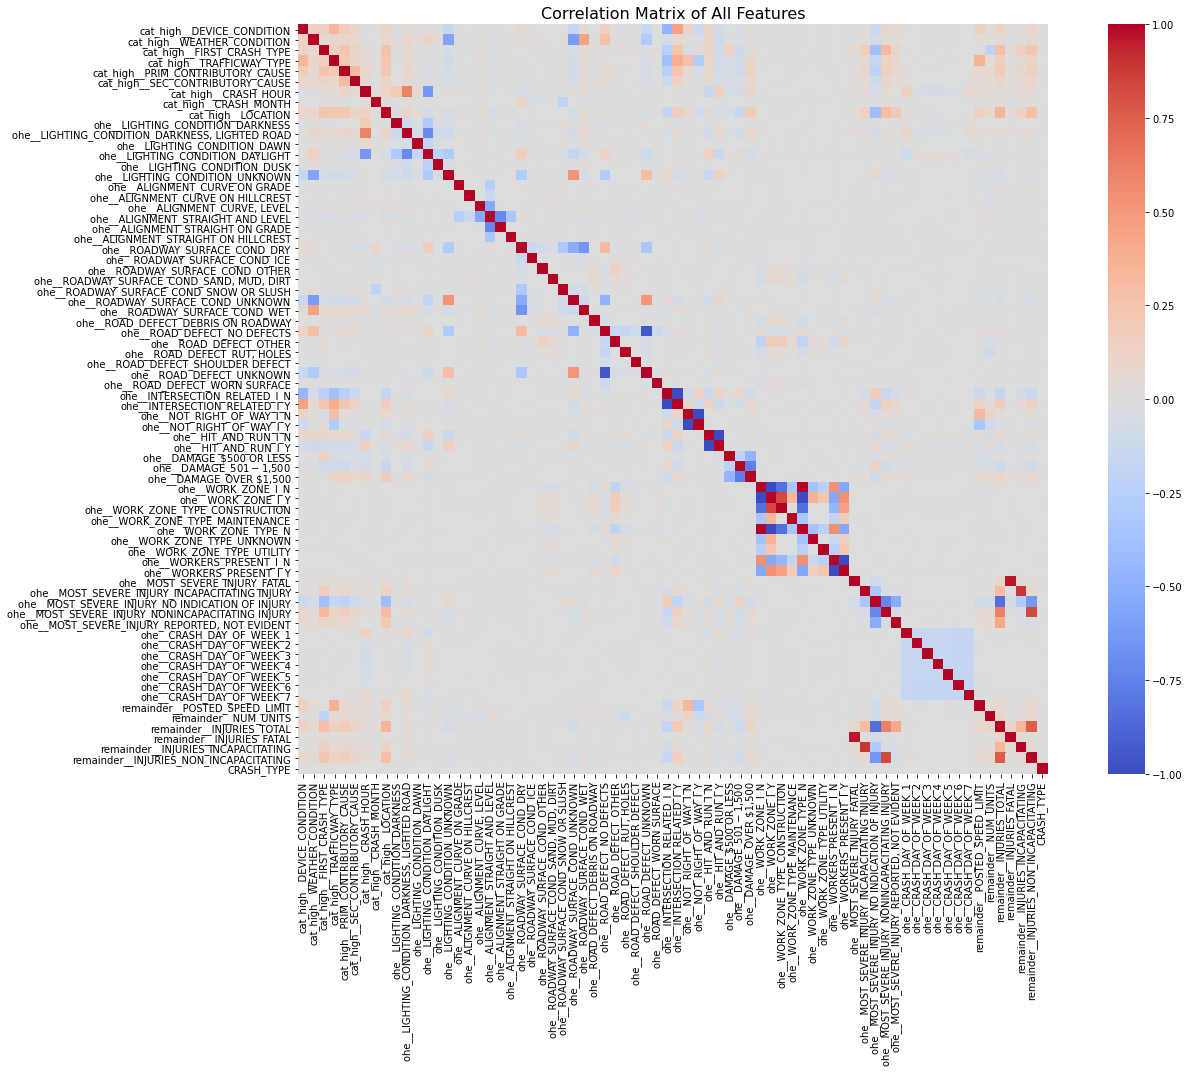

Highly correlated feature pairs:
ohe__MOST_SEVERE_INJURY_FATAL - remainder__INJURIES_FATAL: 0.96
remainder__INJURIES_FATAL - ohe__MOST_SEVERE_INJURY_FATAL: 0.96
ohe__MOST_SEVERE_INJURY_INCAPACITATING INJURY - remainder__INJURIES_INCAPACITATING: 0.89
remainder__INJURIES_INCAPACITATING - ohe__MOST_SEVERE_INJURY_INCAPACITATING INJURY: 0.89
remainder__INJURIES_NON_INCAPACITATING - ohe__MOST_SEVERE_INJURY_NONINCAPACITATING INJURY: 0.83
ohe__MOST_SEVERE_INJURY_NONINCAPACITATING INJURY - remainder__INJURIES_NON_INCAPACITATING: 0.83
ohe__WORK_ZONE_TYPE_CONSTRUCTION - ohe__WORK_ZONE_I_Y: 0.83
ohe__WORK_ZONE_I_Y - ohe__WORK_ZONE_TYPE_CONSTRUCTION: 0.83
remainder__INJURIES_NON_INCAPACITATING - remainder__INJURIES_TOTAL: 0.76
remainder__INJURIES_TOTAL - remainder__INJURIES_NON_INCAPACITATING: 0.76
ohe__MOST_SEVERE_INJURY_NONINCAPACITATING INJURY - remainder__INJURIES_TOTAL: 0.61
remainder__INJURIES_TOTAL - ohe__MOST_SEVERE_INJURY_NONINCAPACITATING INJURY: 0.61
ohe__LIGHTING_CONDITION_DARKNESS, LIG

In [37]:

def analyze_and_plot_correlations(df, threshold=0.5, target=None):
    # Compute correlation matrix
    corr_matrix = df.corr()
    
    # Plot heatmap
    plt.figure(figsize=(20, 15))
    sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', square=True)
    plt.title('Correlation Matrix of All Features', fontsize=16)
    plt.tight_layout()
    plt.show()
    
    # Get high correlations
    high_corrs = corr_matrix.unstack()
    high_corrs = high_corrs[(abs(high_corrs) > threshold) & (abs(high_corrs) < 1.0)]
    high_corrs = high_corrs.sort_values(ascending=False).reset_index()
    high_corrs.columns = ['Feature 1', 'Feature 2', 'Correlation']
    
    # Print highly correlated feature pairs
    print("Highly correlated feature pairs:")
    for _, row in high_corrs.iterrows():
        print(f"{row['Feature 1']} - {row['Feature 2']}: {row['Correlation']:.2f}")
    
    # Focus on specific feature correlations if provided
    if target:
        target_corrs = corr_matrix[target]
        target_corrs = target_corrs[(abs(target_corrs) > threshold) & (abs(target_corrs) < 1.0)]
        target_corrs = target_corrs.sort_values(key=abs, ascending=False)
        
        print(f"\nFeatures highly correlated with {target}:")
        for feat, corr in target_corrs.items():
            print(f"{feat}: {corr:.2f}")

# Usage
#add CRASH_TYPE to X_train for analysis
X_train_plus_target  = pd.concat([X_train, y_train], axis=1)

analyze_and_plot_correlations(X_train_plus_target, threshold=0.5, target='CRASH_TYPE')

In [39]:
# Get the correlation matrix
corr_matrix = X_train_plus_target.corr()

# Calculate the average correlation of each feature with all other features
avg_corrs = corr_matrix.apply(lambda x: x[(x.index != x.name)].abs().mean())

# Sort the features by their average correlation
avg_corrs = avg_corrs.sort_values(ascending=False)

avg_corrs

ohe__MOST_SEVERE_INJURY_NO INDICATION OF INJURY    0.092382
remainder__INJURIES_TOTAL                          0.087960
ohe__WORK_ZONE_TYPE_N                              0.080455
ohe__WORK_ZONE_I_Y                                 0.080455
ohe__WORK_ZONE_I_N                                 0.080455
                                                     ...   
ohe__ALIGNMENT_STRAIGHT ON HILLCREST               0.009879
ohe__LIGHTING_CONDITION_DUSK                       0.009810
ohe__ALIGNMENT_CURVE ON HILLCREST                  0.006880
ohe__ROAD_DEFECT_SHOULDER DEFECT                   0.004655
CRASH_TYPE                                         0.002882
Length: 72, dtype: float64


In [44]:
avg_corrs = corr_matrix.mean(axis=1)
avg_corrs = avg_corrs[(avg_corrs.index != avg_corrs.name)]
max_corr_feature = avg_corrs.idxmax()
max_corr_feature

'remainder__INJURIES_TOTAL'

In [ ]:
def analyze_and_plot_correlations(df, threshold=0.5, target=None, target_threshold=0.3):
    # Compute correlation matrix
    corr_matrix = df.corr()
    
    # Plot heatmap
    plt.figure(figsize=(20, 15))
    sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', square=True)
    plt.title('Correlation Matrix of All Features', fontsize=16)
    plt.tight_layout()
    plt.show()
    
    # Get high correlations
    high_corrs = corr_matrix.unstack()
    high_corrs = high_corrs[(abs(high_corrs) > threshold) & (abs(high_corrs) <= 1.0)]
    high_corrs = high_corrs.sort_values(ascending=False).reset_index()
    high_corrs.columns = ['Feature 1', 'Feature 2', 'Correlation']
    
    # Print highly correlated feature pairs
    print("Highly correlated feature pairs:")
    for _, row in high_corrs.iterrows():
        print(f"{row['Feature 1']} - {row['Feature 2']}: {row['Correlation']:.2f}")
    
    # Focus on specific feature correlations if provided
    if target:
        target_corrs = corr_matrix[target].drop(target)
        
        print(f"\nAll correlations with {target}:")
        for feat, corr in target_corrs.sort_values(key=abs, ascending=False).items():
            print(f"{feat}: {corr:.2f}")
        
        print(f"\nFeatures with correlation > {target_threshold} with {target}:")
        target_high_corrs = target_corrs[abs(target_corrs) > target_threshold]
        for feat, corr in target_high_corrs.sort_values(key=abs, ascending=False).items():
            print(f"{feat}: {corr:.2f}")

# Usage
X_train_plus_target = pd.concat([X_train, y_train], axis=1)

analyze_and_plot_correlations(X_train_plus_target, threshold=0.5, target='CRASH_TYPE', target_threshold=0.3)

In [ ]:
X_train_plus_target = pd.concat([X_train, y_train], axis=1)

target_corrs = X_train_plus_target.corr()
target_corrs['CRASH_TYPE'].sort_values(ascending=False)
target_corrs = target_corrs[(abs(target_corrs) > 0.5) & (abs(target_corrs) < 1.0)]
target_corrs = target_corrs.sort_values(by = 'CRASH_TYPE',key=abs, ascending=False)
target_corrs

print(f"\nFeatures highly correlated with:")
for feat, corr in target_corrs.items():
    print(f"{feat}: {corr:.2f}")

In [ ]:
X_train_plus_target = pd.concat([X_train, y_train], axis=1)
corr = X_train_plus_target.corr()
corr

Our data is ready for modeling. We have several highly correlated features which is expected after One Hot Encoding. We will keep the unrelated features in mind when we are modeling to prevent the effects of multicollinearity.E.g. we may neeed to use Lasso or Ridge to handle multicollinearity by shrinking the coefficients of correlated variables or use Principal Component Analysis to transform the feature space into a smaller set of uncorrelated variable which will also help in reducing dimensionality

# 4. Modeling

# 5. Model Validation

# 6. Conclusion and Summary